## Question 9: Produce suitable charts to illustrate your results and export them in your project folder.

### Part 1: Import Libraries and file for visualization

In [2]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
#import file

df_final_subset = pd.read_pickle(r'C:\Users\mrtak\08-2023 Instacart Business Analytics\02 Data\Prepared Data\'final_subset_sample.pkl')

In [4]:
df_final_subset.head()

,gender,state,age,n_dependants,fam_status,income,order_number,loyalty_flag,spending_flag,frequency_flag,...,busiest_period_of_day,region,department,age_group,income_group,dependents_group,customer_profile,customer_income_profile,time_period,day
2,Female,Alabama,31,3,married,40423,7,New Customer,Low Spender,Non-frequent customer,...,Most orders,South,beverages,Mid-Age Adult,Low Income,Parent,Married Older Parent,Low income married older parent,Between 8 am and 5 pm,Sunday
7,Female,Alabama,31,3,married,40423,5,New Customer,Low Spender,Non-frequent customer,...,Most orders,South,snacks,Mid-Age Adult,Low Income,Parent,Married Older Parent,Low income married older parent,Between 8 am and 5 pm,Wednesday
12,Female,Alabama,31,3,married,40423,3,New Customer,Low Spender,Non-frequent customer,...,Most orders,South,pantry,Mid-Age Adult,Low Income,Parent,Married Older Parent,Low income married older parent,Between 8 am and 5 pm,Tuesday
17,Female,Alabama,31,3,married,40423,7,New Customer,Low Spender,Non-frequent customer,...,Most orders,South,breakfast,Mid-Age Adult,Low Income,Parent,Married Older Parent,Low income married older parent,Between 8 am and 5 pm,Sunday
24,Female,Indiana,69,0,divorced/widowed,54313,22,Regular Customer,Low Spender,Regular customer,...,Most orders,Midwest,snacks,Elderly Adult,Middle Income,No Children,Single Female w/o Children,Middle income single female without children,Between 8 am and 5 pm,Sunday


In [5]:
df_final_subset.shape

(3914726, 27)

In [6]:
df_final_subset.columns

Index(['gender', 'state', 'age', 'n_dependants', 'fam_status', 'income',
       'order_number', 'loyalty_flag', 'spending_flag', 'frequency_flag',
       'activity_flag', 'order_dow', 'order_hour_of_day', 'department_id',
       'prices', 'price_range_loc', 'busiest_day', 'busiest_period_of_day',
       'region', 'department', 'age_group', 'income_group', 'dependents_group',
       'customer_profile', 'customer_income_profile', 'time_period', 'day'],
      dtype='object')

### 1. The sales team needs to know what the busiest days of the week and hours of the day are (i.e., the days and times with the most orders) in order to schedule ads at times when there are fewer orders.

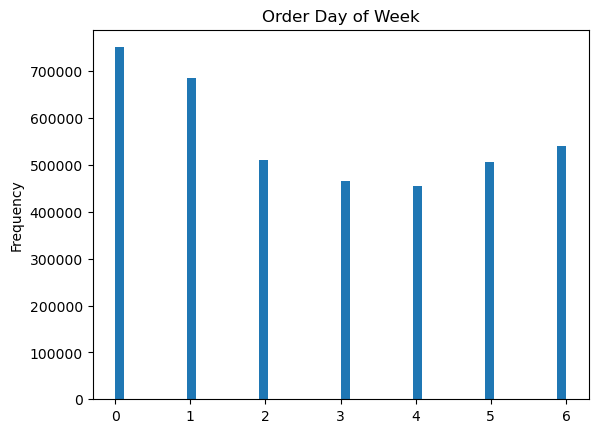

In [7]:
hist_day_of_week = df_final_subset['order_dow'].plot.hist(bins = 50, title = 'Order Day of Week')

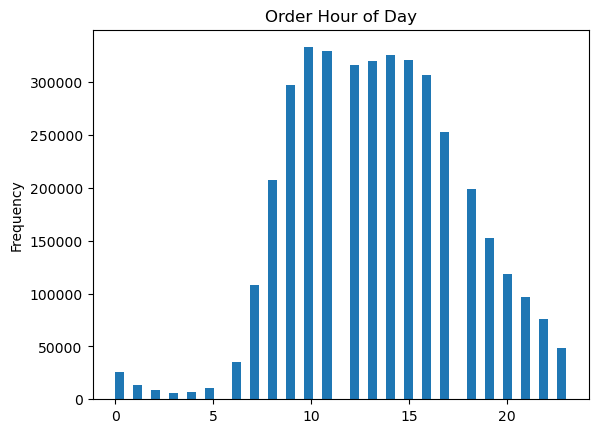

In [8]:
hist_hour_of_day = df_final_subset['order_hour_of_day'].plot.hist(bins = 50, title = 'Order Hour of Day')

The busiest days of the week are Saturday and Sunday. Tuesday and Wednesday are the least busiest. Monday, Thursday, and Friday are in the middle ground.

The busiest hours of the day ranges from 9am to 4pm during working hours. The least busiest hours are between 10pm to 7am. The order frequency start to climb at 7am, then peak in early afternoon until it slows down during early evening.

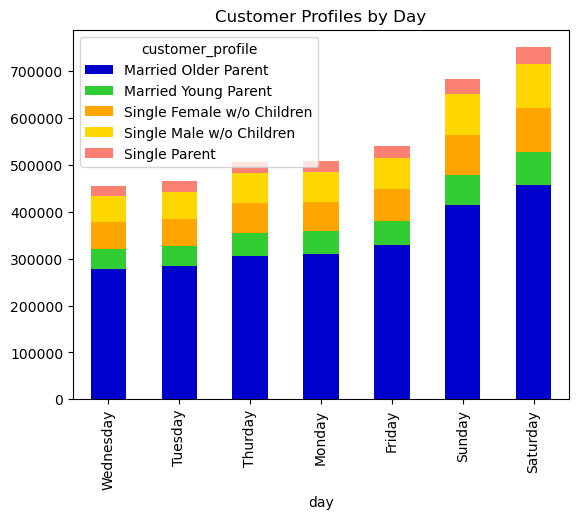

In [9]:
# Group customer profile and days

cust_prof_day = df_final_subset.groupby(['day', 'customer_profile']).size().unstack()

# Sort

cust_prof_day = cust_prof_day.loc[cust_prof_day.sum(axis=1).sort_values(ascending=True).index]

# Create bar chart

cust_prof_day_bar = cust_prof_day.plot.bar(stacked = True, title = 'Customer Profiles by Day', color = ['mediumblue', 'limegreen', 'orange', 'gold', 'salmon'])

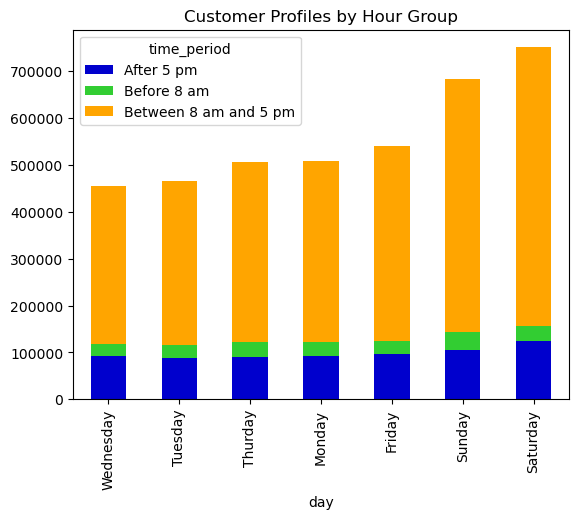

In [10]:
# Group customer profile and days

cust_prof_hour_group = df_final_subset.groupby(['day', 'time_period']).size().unstack()

# Sort

cust_prof_hour_group = cust_prof_hour_group.loc[cust_prof_day.sum(axis=1).sort_values(ascending=True).index]

# Create bar chart

cust_prof_hour_group_bar = cust_prof_hour_group.plot.bar(stacked = True, title = 'Customer Profiles by Hour Group', color = ['mediumblue', 'limegreen', 'orange', 'gold', 'salmon'])

Each customer profile reflects the same distribution as noted at the aggregate level.

In [11]:
#export visualizations

hist_day_of_week.figure.savefig(r'C:\Users\mrtak\08-2023 Instacart Business Analytics\04 Analysis\Visualizations\1 order_day_of_week.png')
hist_hour_of_day.figure.savefig(r'C:\Users\mrtak\08-2023 Instacart Business Analytics\04 Analysis\Visualizations\1 order_hour_of_day.png')
cust_prof_day_bar.figure.savefig(r'C:\Users\mrtak\08-2023 Instacart Business Analytics\04 Analysis\Visualizations\1 cust_prof_by_day.png')
cust_prof_hour_group_bar.figure.savefig(r'C:\Users\mrtak\08-2023 Instacart Business Analytics\04 Analysis\Visualizations\1 cust_prof_by_hour.png')

### 2. They also want to know whether there are particular times of the day when people spend the most money, as this might inform the type of products they advertise at these times.

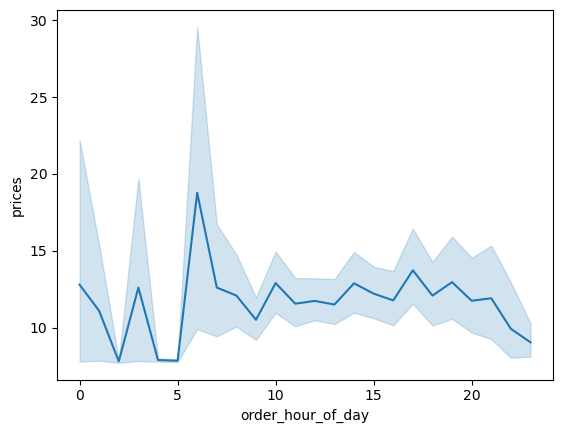

In [12]:
# Create line chart of prices

line_prices_hour = sns.lineplot(data = df_final_subset, x = 'order_hour_of_day',y = 'prices')

In the chart, it seems most money is spent between 6-7 am and between 3-6 pm. The least amount of money spent is between 9pm-12pm.

In [13]:
#export visualizations

line_prices_hour.figure.savefig(r'C:\Users\mrtak\08-2023 Instacart Business Analytics\04 Analysis\Visualizations\2 line_prices_hour.png')

### 3. Instacart has a lot of products with different price tags. Marketing and sales want to use simpler price range groupings to help direct their efforts.

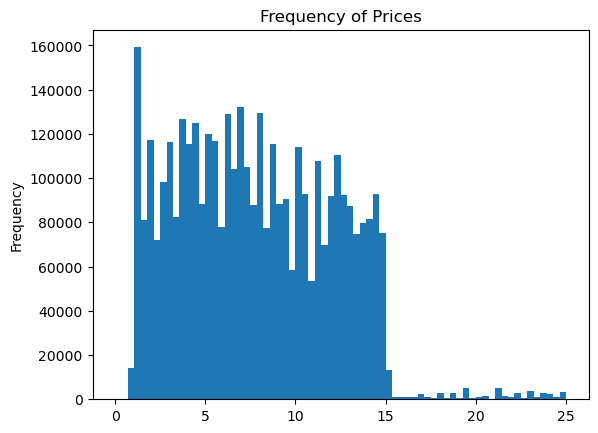

In [14]:
#create histogram of prices column

hist_prices = df_final_subset['prices'].plot.hist(bins = 70, title = 'Frequency of Prices', range = [0 ,25])

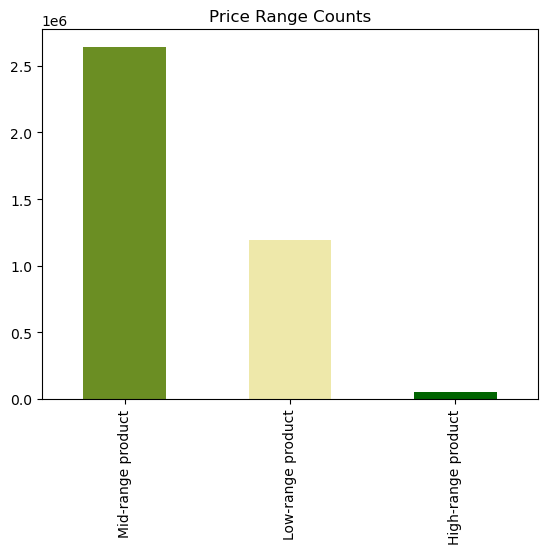

In [15]:
#create bar chart of price ranges

bar_price_range = df_final_subset['price_range_loc'].value_counts().plot.bar(title = 'Price Range Counts', color = ['olivedrab', 'palegoldenrod', 'darkgreen'] )

There's a huge reduction in order frequency for products that are over $15, with minimal trace. On the other hand, mid-range products have the very highest frequency.

To breakdown:
a) 15 dollar products into mid-range products, priced between 6 - 15 dollars 
b) low-range products, priced less than 6 dollars
c) high range products $15 or over



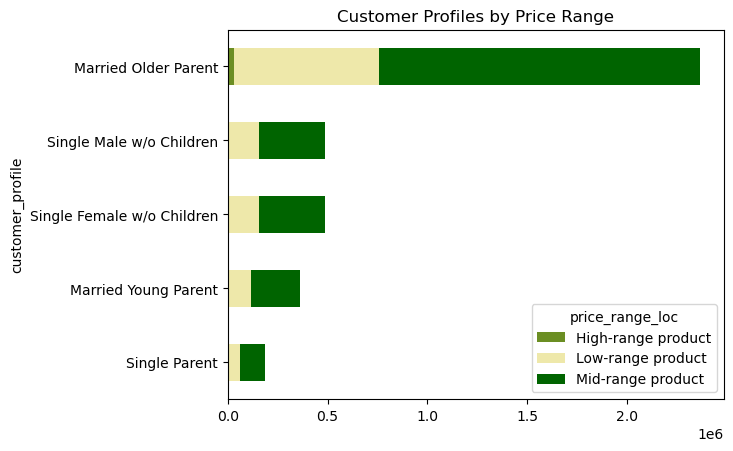

In [16]:
# Group customer profile and price range

cust_prof_price_range = df_final_subset.groupby(['customer_profile', 'price_range_loc']).size().unstack()

# Sort

cust_prof_price_range = cust_prof_price_range.loc[cust_prof_price_range.sum(axis=1).sort_values(ascending=True).index]

# Create bar chart

bar_cust_prof_price_range = cust_prof_price_range.plot.barh(stacked = True, title = 'Customer Profiles by Price Range', color = ['olivedrab', 'palegoldenrod', 'darkgreen'])

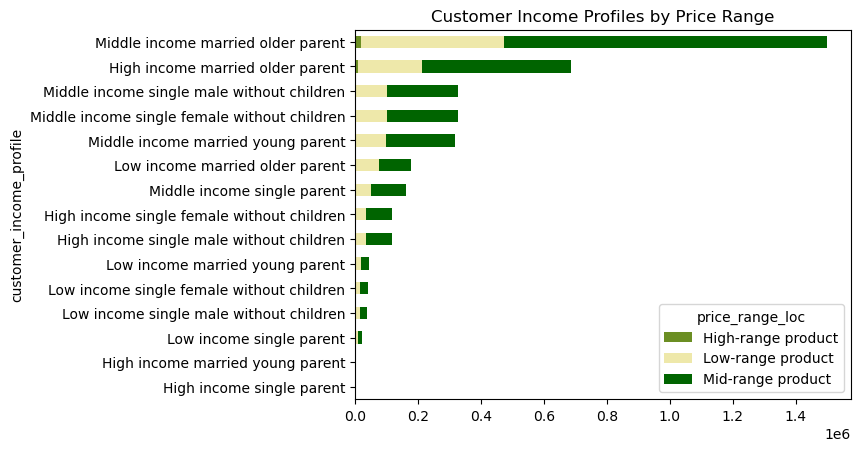

In [17]:
# Group customer profile and departments

cust_inc_prof_price_range = df_final_subset.groupby(['customer_income_profile', 'price_range_loc']).size().unstack()

# Sort

cust_inc_prof_price_range = cust_inc_prof_price_range.loc[cust_inc_prof_price_range.sum(axis=1).sort_values(ascending=True).index]

# Create bar chart

bar_cust_inc_prof_price_range = cust_inc_prof_price_range.plot.barh(stacked = True, title = 'Customer Income Profiles by Price Range', color = ['olivedrab', 'palegoldenrod', 'darkgreen']) 

The higher frequency of mid-range product orders is consistent across the customer profile groups.

The higher frequency of mid-range product orders is also consistent across the customer income profile groups, regardless of customer spending power.

Closest customer profile with even splits between mid-range and low-range product orders for low income singles or low income married couples.

In [19]:
#export visualizations

hist_prices.figure.savefig(r'C:\Users\mrtak\08-2023 Instacart Business Analytics\04 Analysis\Visualizations\3 hist_prices.png')
bar_price_range.figure.savefig(r'C:\Users\mrtak\08-2023 Instacart Business Analytics\04 Analysis\Visualizations\3 bar_price_range.png')
bar_cust_prof_price_range.figure.savefig(r'C:\Users\mrtak\08-2023 Instacart Business Analytics\04 Analysis\Visualizations\3 bar_cust_prof_price_range.png')
bar_cust_inc_prof_price_range.figure.savefig(r'C:\Users\mrtak\08-2023 Instacart Business Analytics\04 Analysis\Visualizations\3 bar_cust_inc_prof_price_range.png')

### 4.  Are there certain types of products that are more popular than others? The marketing and sales teams want to know which departments have the highest frequency of product orders.

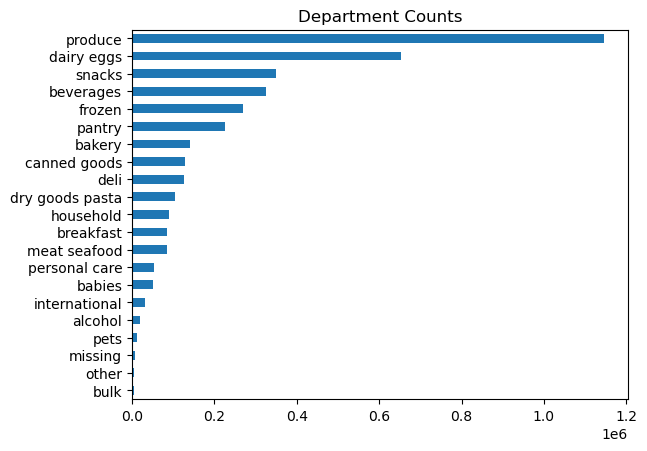

In [20]:
# Create a bar chart from the "department" column

bar_dept = df_final_subset['department'].value_counts().sort_values(ascending=True).plot.barh( title = 'Department Counts' )

The five most popular departments are produce, dairy eggs, snacks, beverages, and frozen. However, produce department have most frequency compared to other departments by at least almost as twice as dairy eggs and three times more than other top 5 departments. The smallest frequencies are for alcohol, pets, missing, other, and bulk.

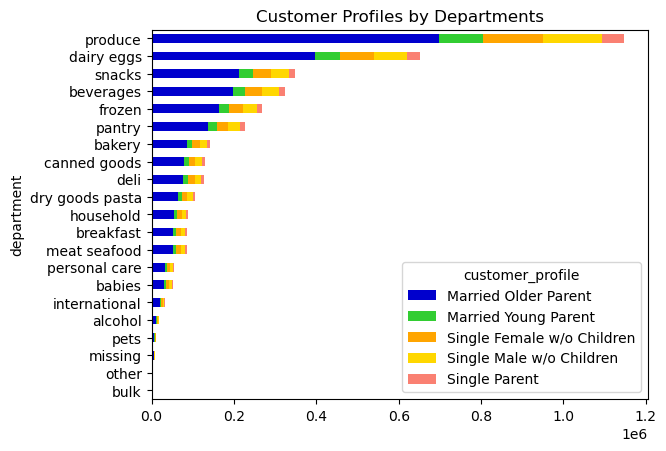

In [21]:
# Group customer profile and departments

cust_prof_depts = df_final_subset.groupby(['department', 'customer_profile']).size().unstack()

# Sort

cust_prof_depts = cust_prof_depts.loc[cust_prof_depts.sum(axis=1).sort_values(ascending=True).index]

# Create bar chart

bar_cust_prof_depts = cust_prof_depts.plot.barh(stacked = True, color = ['mediumblue', 'limegreen', 'orange', 'gold', 'salmon'], title = 'Customer Profiles by Departments')

The preference types of products for each department highly reflect distribution of customer profile, which targeting strategies are not required

In [ ]:
#export visualizations

bar_dept.figure.savefig(r'C:\Users\mrtak\08-2023 Instacart Business Analytics\04 Analysis\Visualizations\4 bar_dept.png')
bar_cust_prof_depts.figure.savefig(r'C:\Users\mrtak\08-2023 Instacart Business Analytics\04 Analysis\Visualizations\4 bar_cust_dept.png')

### 5. What’s the distribution among users in regards to their brand loyalty (i.e., how often do they return to Instacart)?

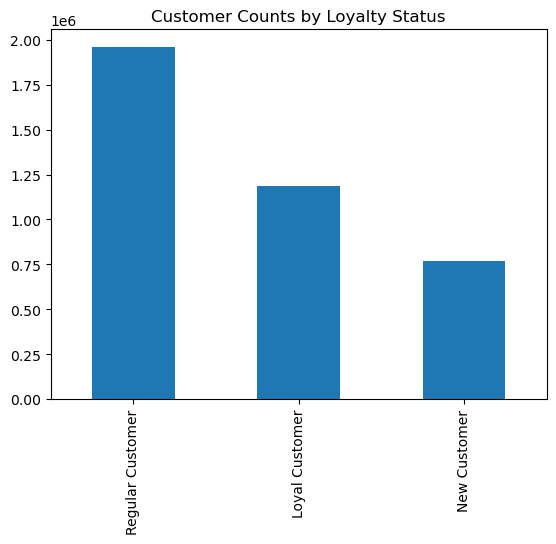

In [22]:
# Create a bar chart from the "loyalty_flag" column

bar_loyalty = df_final_subset['loyalty_flag'].value_counts().plot.bar(title = 'Customer Counts by Loyalty Status' )

Most Instacart users are regular customers, having returned to Instacart between 11 - 40 times.  Loyal customers arecustomers who have returned more than 40 times are in the middle frequency wise. The least frequent loyalty group are new customers, who have returned 10 times or less to Instacart.

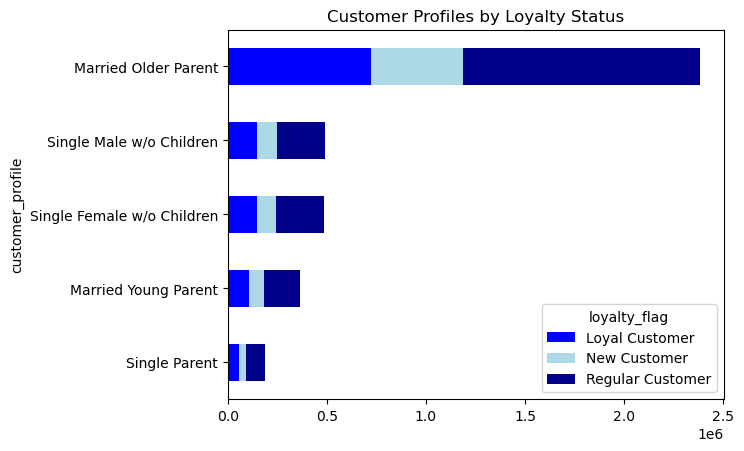

In [22]:
# Group customer profile and loyalty flag

cust_prof_loyalty = df_final_subset.groupby(['customer_profile', 'loyalty_flag']).size().unstack()

# Sort

cust_prof_loyalty = cust_prof_loyalty.loc[cust_prof_loyalty.sum(axis=1).sort_values(ascending=True).index]

# Create bar chart

bar_cust_prof_loyalty = cust_prof_loyalty.plot.barh(stacked = True, title = 'Customer Profiles by Loyalty Status', color = ['blue','lightblue','darkblue'])

Each customer profile group follows a very similar distribution pattern of loyalty flag, with higher frequency of regular customers and lower frequency of newer customers

In [23]:
#export visualizations

bar_loyalty.figure.savefig(r'C:\Users\mrtak\08-2023 Instacart Business Analytics\04 Analysis\Visualizations\5 bar_loyalty.png')
bar_cust_prof_loyalty.figure.savefig(r'C:\Users\mrtak\08-2023 Instacart Business Analytics\04 Analysis\Visualizations\5 bar_cust_loyalty.png')

### 6. Are there differences in ordering habits based on a customer’s loyalty status?

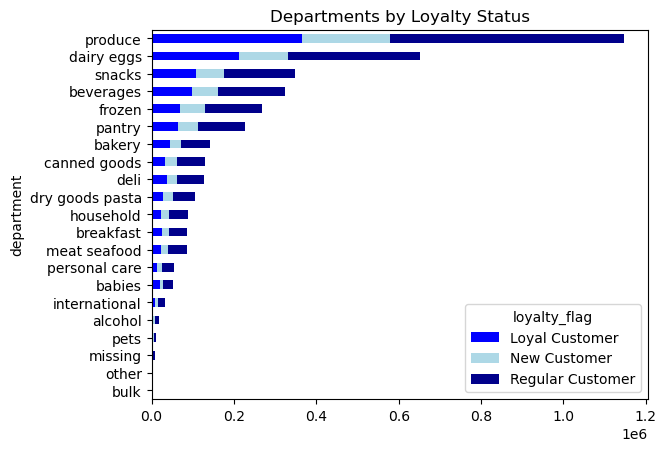

In [24]:
# Group departments and loyalty flag

dep_loyalty = df_final_subset.groupby(['department', 'loyalty_flag']).size().unstack()

# Sort

dep_loyalty = dep_loyalty.loc[dep_loyalty.sum(axis=1).sort_values(ascending=True).index]

# Create bar chart

bar_dep_loyalty = dep_loyalty.plot.barh(stacked = True, title = 'Departments by Loyalty Status', color = ['blue','lightblue','darkblue'])

Each product department groups follows a very similar distribution pattern of loyalty flag, with higher frequency of regular customers and lower frequency of newer customers. However, it follows a very similar pattern to the loyalty groups of customers as well.

In [25]:
#export visualizations

bar_dep_loyalty.figure.savefig(r'C:\Users\mrtak\08-2023 Instacart Business Analytics\04 Analysis\Visualizations\6 bar_dep_loyalty.png')


### 7.  Are there differences in ordering habits based on a customer’s region?

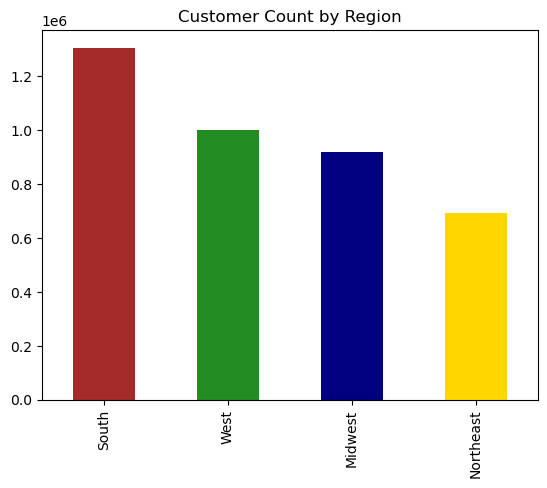

In [26]:
#create region bar from 'region' column

region_bar = df_final_subset['region'].value_counts().plot.bar(title = 'Customer Count by Region', color =['brown', 'forestgreen', 'navy', 'gold'])

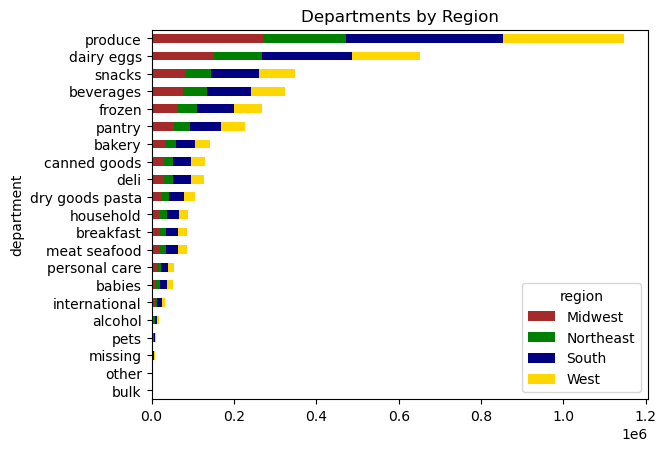

In [27]:
# Group customer profile and regions

cust_prof_region = df_final_subset.groupby(['department', 'region']).size().unstack()

# Sort

cust_prof_region = cust_prof_region.loc[cust_prof_region.sum(axis=1).sort_values(ascending=True).index]

# Create bar chart

cust_prof_region_bar = cust_prof_region.plot.barh(stacked = True, title = 'Departments by Region', color = ['brown', 'green', 'navy', 'gold'])

The South region has the highest frequency of orders, followed by the West and Midwest regions.  The Northeast region has the lowest frequency of customer orders.

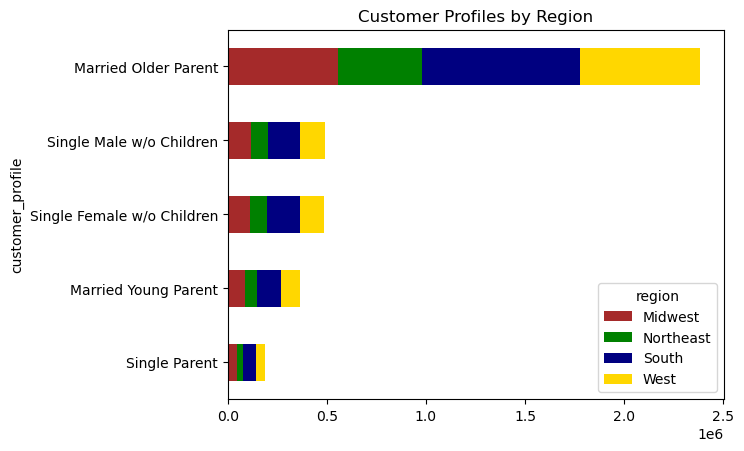

In [28]:
# Group customer profile and regions

cust_prof_region = df_final_subset.groupby(['customer_profile', 'region']).size().unstack()

# Sort

cust_prof_region = cust_prof_region.loc[cust_prof_region.sum(axis=1).sort_values(ascending=True).index]

# Create bar chart

bar_cust_prof_region = cust_prof_region.plot.barh(stacked = True, title = 'Customer Profiles by Region', color = ['brown', 'green', 'navy', 'gold'])

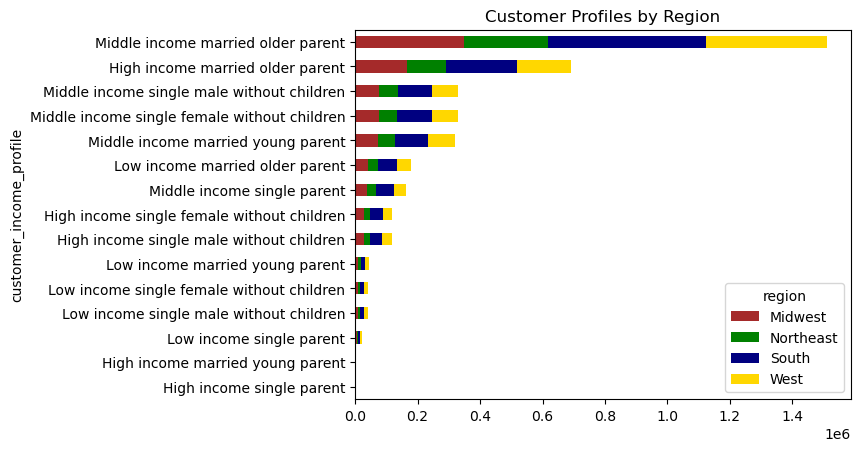

In [29]:
# Group customer income profile and regions

cust_inc_prof_region = df_final_subset.groupby(['customer_income_profile', 'region']).size().unstack()

# Sort

cust_inc_prof_region = cust_inc_prof_region.loc[cust_inc_prof_region.sum(axis=1).sort_values(ascending=True).index]

# Create bar chart

bar_cust_inc_prof_region = cust_inc_prof_region.plot.barh(stacked = True, title = 'Customer Profiles by Region', color = ['brown', 'green', 'navy', 'gold'])

The distribution of regions by customer profile and customer income profile is very similar to region distribution of orders. The South have highest percentage of orders, while the Northeast have lowest percentage of orders. 

In [30]:
#export visualizations

region_bar.figure.savefig(r'C:\Users\mrtak\08-2023 Instacart Business Analytics\04 Analysis\Visualizations\7 region_bar.png')
cust_prof_region_bar.figure.savefig(r'C:\Users\mrtak\08-2023 Instacart Business Analytics\04 Analysis\Visualizations\7 cust_prof_region_bar.png')
bar_cust_prof_region.figure.savefig(r'C:\Users\mrtak\08-2023 Instacart Business Analytics\04 Analysis\Visualizations\7 bar_cust_prof_region.png')
bar_cust_inc_prof_region.figure.savefig(r'C:\Users\mrtak\08-2023 Instacart Business Analytics\04 Analysis\Visualizations\7 bar_cust_inc_prof_region.png')

### 8. Is there a connection between age and family status in terms of ordering habits?

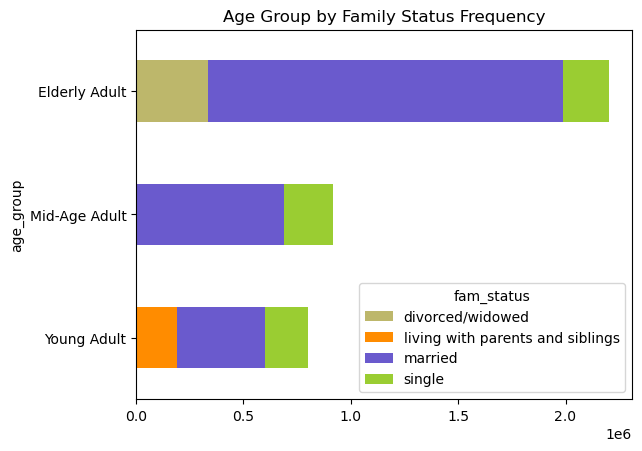

In [31]:
# Group age and family status

age_grp_fam_stat = df_final_subset.groupby(['age_group', 'fam_status']).size().unstack()

# Sort

age_grp_fam_stat = age_grp_fam_stat.loc[age_grp_fam_stat.sum(axis=1).sort_values(ascending=True).index]

# Create bar chart

bar_age_grp_fam_stat = age_grp_fam_stat.plot.barh(stacked = True, color = ['darkkhaki', 'darkorange', 'slateblue', 'yellowgreen'], title = 'Age Group by Family Status Frequency')

In all age groups, married adults have the highest frequency of orders

In [32]:
#export visualizations

bar_age_grp_fam_stat.figure.savefig(r'C:\Users\mrtak\08-2023 Instacart Business Analytics\04 Analysis\Visualizations\8 bar_age_grp_fam_stat.png') 

### 9. What different classifications does the demographic information suggest? Age? Income? Certain types of goods? Family status?

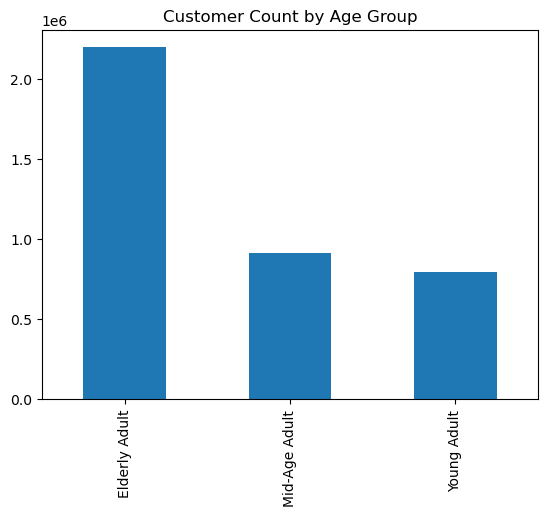

In [24]:
# Create a bar chart from the "age_group" column

age_group_bar = df_final_subset['age_group'].value_counts().plot.bar(title = 'Customer Count by Age Group')


In [25]:
# Aggregate age group by orders

df_final_subset.groupby('age_group').agg({'order_number':['min', 'mean', 'max']})

order_number               
                       min       mean max
age_group                                
Elderly Adult            1  17.141126  99
Mid-Age Adult            1  17.236515  99
Young Adult              1  17.032908  99

In [26]:
# Aggregate age group by income

df_final_subset.groupby('age_group').agg({'prices':['min', 'mean', 'max']})

prices                    
                 min       mean      max
age_group                               
Elderly Adult    1.0  11.898085  99999.0
Mid-Age Adult    1.0  12.236709  99999.0
Young Adult      1.0  12.280851  99999.0

Elderly Adults have the highest frequency and Young Adults have the lowest frequency. Mid-Age Adults have slightly higher frequency than Young Adults.

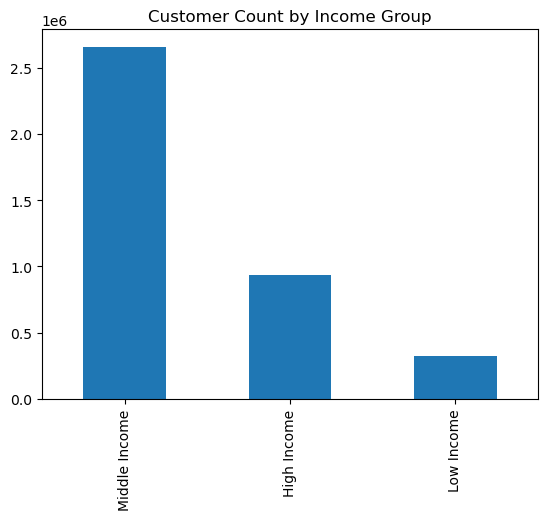

In [27]:
# Create a bar chart from the "income_group" column

income_group_bar = df_final_subset['income_group'].value_counts().plot.bar(title = 'Customer Count by Income Group')


In [28]:
# Aggregate income group by orders

df_final_subset.groupby('income_group').agg({'order_number':['min', 'mean', 'max']})

order_number               
                       min       mean max
income_group                             
High Income              1  17.366661  99
Low Income               1  15.899074  99
Middle Income            1  17.214326  99

In [29]:
# Aggregate income group by prices

df_final_subset.groupby('income_group').agg({'prices':['min', 'mean', 'max']})

prices                    
                 min       mean      max
income_group                            
High Income      1.0  22.972225  99999.0
Low Income       1.0   6.601008     25.0
Middle Income    1.0   8.881131  99999.0

Middle income customers have the highest frequency of orders by more than 3 times the upper income group. On the other hand, Upper Income customers have more than 3 times the order frequency of the low income group. Low income group have smallest frequency of orders.

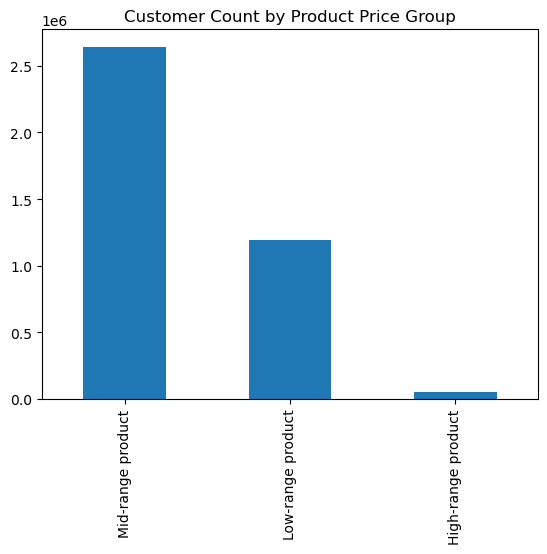

In [30]:
# Create a bar chart from the "price_range_loc" column

product_price_group_bar = df_final_subset['price_range_loc'].value_counts().plot.bar(title = 'Customer Count by Product Price Group')


In [31]:
# Aggregate price groups by order numbers

df_final_subset.groupby('price_range_loc').agg({'order_number':['min', 'mean', 'max']})

order_number               
                            min       mean max
price_range_loc                               
High-range product            1  15.809463  99
Low-range product             1  17.126281  99
Mid-range product             1  17.178417  99

In [32]:
# Aggregate price groups by prices

df_final_subset.groupby('price_range_loc').agg({'prices':['min', 'mean', 'max']})

prices                     
                      min        mean      max
price_range_loc                               
High-range product   15.1  353.894969  99999.0
Low-range product     1.0    2.976994      4.9
Mid-range product     5.1    9.757064     15.0

The mid-range products have the highest order frequency.  Followed by the low-range products.  The high-range products has only a very small number of orders, and has the least frequency.

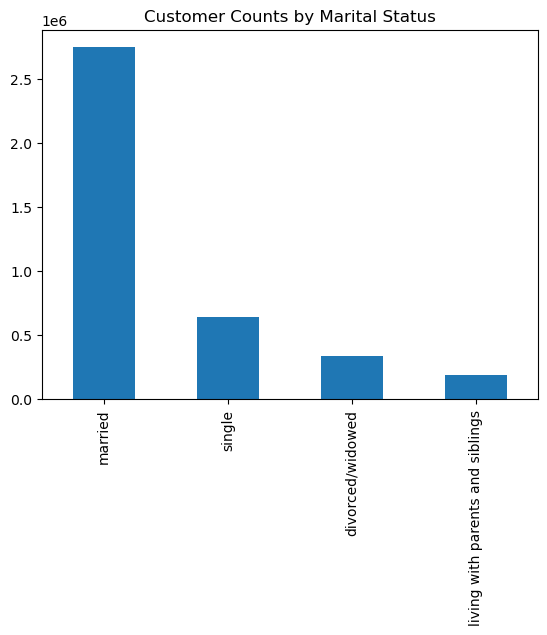

In [33]:
# Create a bar chart from the "marital_status" column

bar_marital_status = df_final_subset['fam_status'].value_counts().plot.bar(title = 'Customer Counts by Marital Status' )

In [34]:
# Aggregate martial status by orders

df_final_subset.groupby('fam_status').agg({'order_number':['min', 'mean', 'max']})

order_number               
                                          min       mean max
fam_status                                                  
divorced/widowed                            1  17.272809  99
living with parents and siblings            1  17.434672  99
married                                     1  17.062634  99
single                                      1  17.324109  99

In [35]:
# Aggregate martial status by orders

df_final_subset.groupby('fam_status').agg({'order_number':['min', 'mean', 'max']})

order_number               
                                          min       mean max
fam_status                                                  
divorced/widowed                            1  17.272809  99
living with parents and siblings            1  17.434672  99
married                                     1  17.062634  99
single                                      1  17.324109  99

The married customers have the highest frequency of orders, by a significant difference to the next highest group, the singles.  The living with parents and siblings group has the least amount of orders.

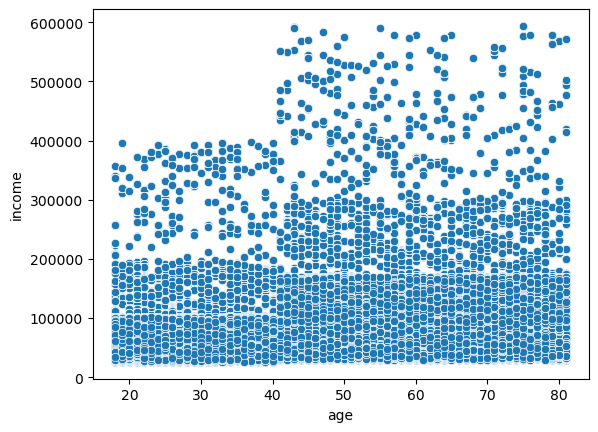

In [36]:
# Create a scatterplot of the "age" and "income" columns

scatt_age_income = sns.scatterplot(x = 'age', y = 'income', data = df_final_subset)

The scatterplot shows a notable increase in spending power after age 40.

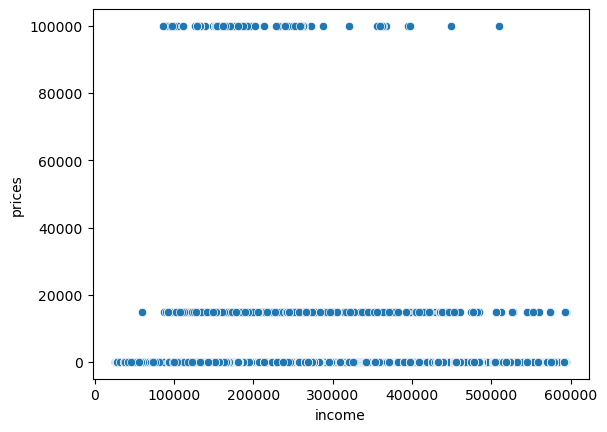

In [37]:
# Create a scatterplot of the "price" and "income" columns

scatt_price_income = sns.scatterplot(x = 'income', y = 'prices', data = df_final_subset)

We notice that as spending power increases past 30k, there is a decrease in the frequency of higher-priced (>$15) products being ordered.  Surprisingly, higher-priced products are more frequently purchased by customers with less income/spending power.

In [38]:
#export visualizations

age_group_bar.figure.savefig(r'C:\Users\mrtak\08-2023 Instacart Business Analytics\04 Analysis\Visualizations\9 age_group_bar.png')
income_group_bar.figure.savefig(r'C:\Users\mrtak\08-2023 Instacart Business Analytics\04 Analysis\Visualizations\9 income_group_bar.png')
bar_marital_status.figure.savefig(r'C:\Users\mrtak\08-2023 Instacart Business Analytics\04 Analysis\Visualizations\9 product_price_group_bar.png')
bar_marital_status.figure.savefig(r'C:\Users\mrtak\08-2023 Instacart Business Analytics\04 Analysis\Visualizations\9 bar_marital_status.png')
scatt_age_income.figure.savefig(r'C:\Users\mrtak\08-2023 Instacart Business Analytics\04 Analysis\Visualizations\9 scatt_age_income.png')
scatt_price_income.figure.savefig(r'C:\Users\mrtak\08-2023 Instacart Business Analytics\04 Analysis\Visualizations\9 scatt_price_income.png')

### 10.  What differences can you find in ordering habits of different customer profiles? Consider the price of orders, the frequency of orders, the products customers are ordering, and anything else you can think of.

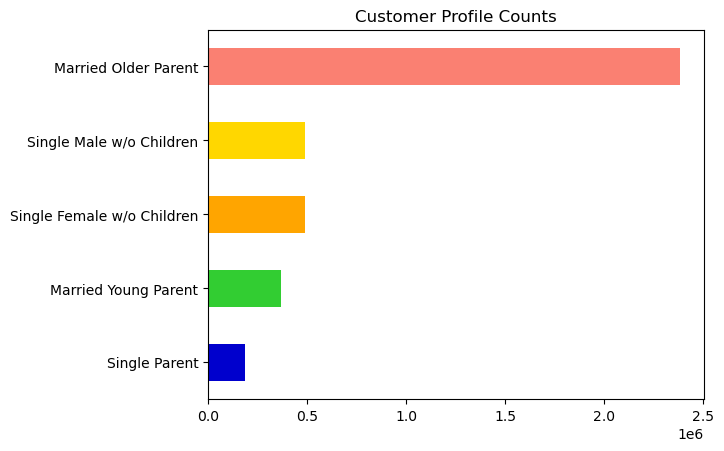

In [50]:
# Create a bar chart from the "customer_profile" column

bar_cust_prof = df_final_subset['customer_profile'].value_counts().sort_values(ascending=True).plot.barh(color = ['mediumblue', 'limegreen', 'orange', 'gold', 'salmon'], title = 'Customer Profile Counts' )

Orders for the married older parent profile greatly exceed the other profiles by more than 3 times.  It's followed by the single male and female groups.  The single parent customer profile has the least amount of orders.

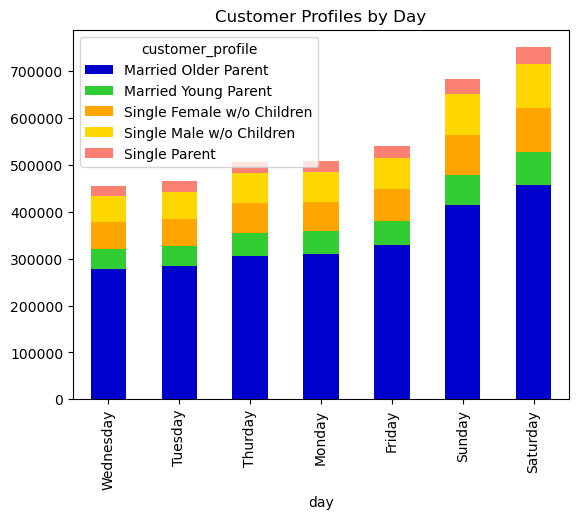

In [51]:
# Group customer profile and days

cust_prof_day = df_final_subset.groupby(['day', 'customer_profile']).size().unstack()

# Sort

cust_prof_day = cust_prof_day.loc[cust_prof_day.sum(axis=1).sort_values(ascending=True).index]

# Create bar chart

cust_prof_day_bar = cust_prof_day.plot.bar(stacked = True, title = 'Customer Profiles by Day', color = ['mediumblue', 'limegreen', 'orange', 'gold', 'salmon'])

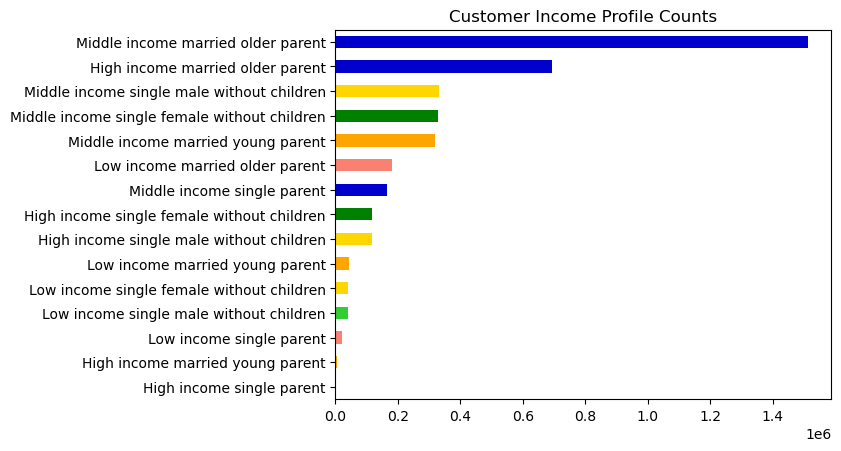

In [52]:
# Create bar chart
bar_cust_inc_prof = df_final_subset['customer_income_profile'].value_counts().sort_values(ascending=True).plot.barh(color = ['salmon','orange','salmon', 'limegreen','gold', 'orange', 'gold', 'green', 'mediumblue', 'salmon','orange','green','gold','mediumblue', 'mediumblue'], title = 'Customer Income Profile Counts' )

The middle income married older parent profile far exceeds the other customer income profile groups.  The next group that follows, the upper income married older parent group, is a little less than half the order frequency.  The customer income profile group with the least orders is the Upper income single parent profile.

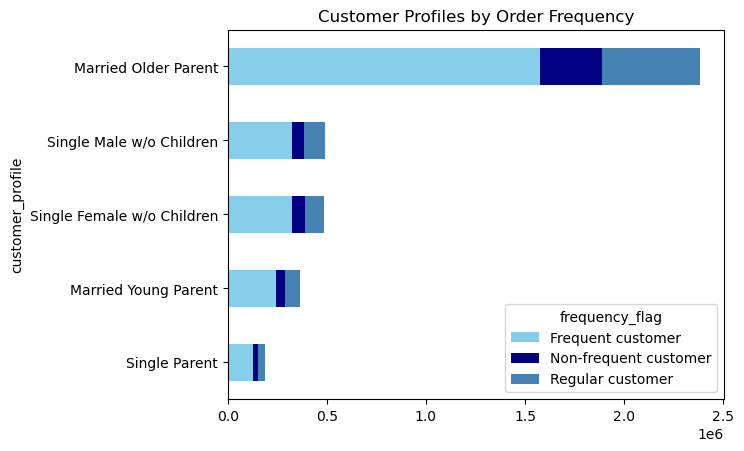

In [53]:
# Group customer profile and loyalty flag

cust_prof_order_frequency = df_final_subset.groupby(['customer_profile', 'frequency_flag']).size().unstack()

# Sort

cust_prof_order_frequency = cust_prof_order_frequency.loc[cust_prof_order_frequency.sum(axis=1).sort_values(ascending=True).index]

# Create bar chart

bar_cust_prof_order_frequency = cust_prof_order_frequency.plot.barh(stacked = True, title = 'Customer Profiles by Order Frequency', color = ['skyblue', 'navy', 'steelblue'])

Across all the customer profiles, the majority of customers fall into the frequent customer group.  A very small population of each profile falls into the non-frequent customer group.

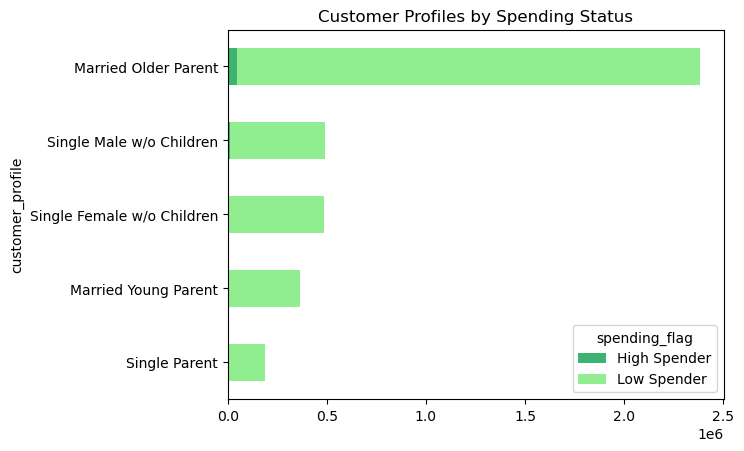

In [54]:
# Group customer profile and spending flag

cust_prof_spending = df_final_subset.groupby(['customer_profile', 'spending_flag']).size().unstack()

# Sort

cust_prof_spending = cust_prof_spending.loc[cust_prof_spending.sum(axis=1).sort_values(ascending=True).index]

# Create bar chart

bar_cust_prof_spending = cust_prof_spending.plot.barh(stacked = True, color = ['mediumseagreen', 'lightgreen'], title = 'Customer Profiles by Spending Status')

Across all profiles, except for the married older parent customer profile, which has only a very low population of high spender customers, there is only the low spender status.

In [56]:
# Export as visualizations

bar_cust_prof.figure.savefig(r'C:\Users\mrtak\08-2023 Instacart Business Analytics\04 Analysis\Visualizations\10 bar_cust_prof')
bar_cust_inc_prof.figure.savefig(r'C:\Users\mrtak\08-2023 Instacart Business Analytics\04 Analysis\Visualizations\10 bar_cust_inc_prof')
bar_cust_prof_order_frequency.figure.savefig(r'C:\Users\mrtak\08-2023 Instacart Business Analytics\04 Analysis\Visualizations\10 bar_cust_prof_order_frequency')
bar_cust_prof_spending.figure.savefig(os.path.join(r'C:\Users\mrtak\08-2023 Instacart Business Analytics\04 Analysis\Visualizations\10 bar_cust_prof_spending'))